___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [78]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [79]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [80]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow import keras

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [81]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [82]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [83]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [84]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [85]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [86]:
  X_train[5].shape

(28, 28)

In [87]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  88, 221, 215, 217, 219, 211, 185, 150, 118,
        107,  99,  88,  83,  90, 135, 212, 203, 207, 219, 169,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  27, 118, 162,  40,   0,   0,   0,  10,
         19,  28,  39,  47,  36,   0,   0, 203, 230, 220, 203,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 138, 136,  71,  69,  54, 216, 217, 203, 184,
        168, 163, 162, 163, 178, 221, 186,  38,  26,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  67, 134, 154, 224, 129,  66,  81, 117, 129,
        128, 132, 137, 131, 129,  86,  73, 157, 151, 134, 216,  18,   0,
          0,   0],
       [  0,   0,   0,   0, 203, 198, 172, 183, 206, 255, 255, 250, 243,
        240, 239, 235, 238, 244, 255, 238, 184, 160,  86,  98,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 122, 188, 224, 151, 105, 127,  97, 100, 105,
        114, 117, 117, 113, 103,  98, 111, 142, 254, 191, 255,  49,   0,
          0,   0],
       [  0,   0,   0,   0, 163, 179, 200,  95, 154, 198, 197, 200, 200,
        198, 197, 198, 199, 202, 200, 176,  86, 206, 157, 162,  10,   0,
          0,   0],
       [  0,   0,   0,   0, 197, 201, 229,  71, 144, 194, 181, 183, 179,
        182, 180, 179, 180, 190, 185, 197,  76, 219, 185, 201,  34,   0,
          0,   0],
       [  0,   0,   0,   0, 199, 193, 226,  58, 154, 192, 184, 187, 184,
        186, 184, 185, 183, 192, 191, 200,  56, 219, 203, 207,  60,   0,
          0,   0],
       [  0,   0,   0,   0, 201, 194, 224,  41, 163, 190, 186, 186, 184,
        185, 183, 185, 178, 190, 194, 202,  33, 211, 200, 206,  73,   0,
          0,   0],
       [  0,   0,   0,   0, 201, 197, 222,  17, 172, 190, 186, 187, 182,
        186, 185, 187, 180, 187, 193, 202,  26, 212, 202, 203,  76,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 197, 223,   0, 177, 189, 184, 185, 178,
        184, 183, 184, 180, 183, 189, 203,  35, 196, 203, 203,  84,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 197, 223,   0, 185, 187, 185, 187, 180,
        184, 182, 183, 178, 182, 183, 205,  44, 159, 207, 201,  85,   0,
          0,   0],
       [  0,   0,   0,   0, 187, 198, 225,   0, 194, 188, 184, 185, 180,
        183, 183, 184, 181, 181, 177, 206,  46, 129, 211, 200,  88,   0,
          0,   0],
       [  0,   0,   0,   6, 186, 200, 211,   0, 199, 189, 184, 184, 185,
        182, 183, 184, 185, 182, 175, 205,  50,  97, 216, 197,  93,   0,
          0,   0],
       [  0,   0,   0,   5, 185, 204, 184,   0, 202, 188, 182, 182, 183,
        183, 184, 182, 180, 182, 174, 202,  63,  59, 220, 196,  94,   0,
          0,   0],
       [  0,   0,   0,   5, 184, 206, 157,   0, 204, 187, 187, 189, 192,
        190, 190, 191, 190, 187, 183, 202,  78,  35, 222, 197,  95,   0,
          0,   0],
       [  0,   0,   0,   5, 183, 208, 127,   0, 197, 166, 153, 149, 149,
        146, 148, 149, 150, 151, 158, 191,  90,   8, 223, 195,  99,   0,
          0,   0],
       [  0,   0,   0,   6, 184, 208, 11

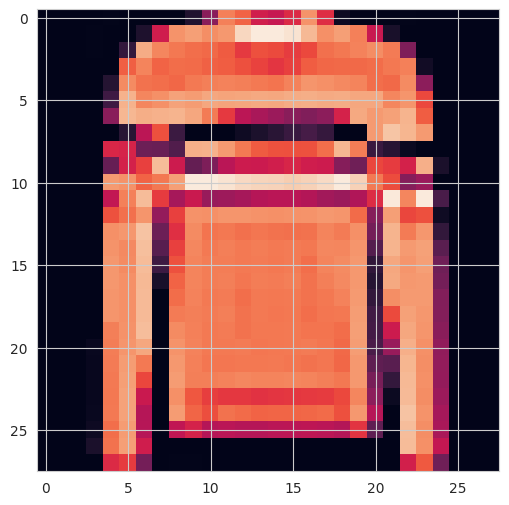

In [88]:
plt.imshow(X_train[5])
plt.show()

In [89]:
y_train[5]

2

In [90]:
y_train.shape

(60000,)

In [91]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [92]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [93]:
classes[int(y_train[0])]

'Ankle boot'

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [94]:
X_train[5].min()

0

In [95]:
X_train[5].max()

255

In [96]:
# Normalize image pixels

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [97]:
X_train[5].min()

0.0

In [98]:
X_train[5].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [99]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [100]:
X_train = np.expand_dims(X_train,3)
X_test = np.expand_dims(X_test,3)

In [101]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [102]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [103]:
y_train.shape

(60000,)

In [104]:
from tensorflow.keras.utils import to_categorical

In [105]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [106]:
y_train[0]

9

In [107]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [109]:
model = Sequential()

model.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")
)  # stride = 1, padding = valid

model.add(MaxPool2D(pool_size=(2, 2)))  # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [110]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4732)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               605824    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607394 (2.32 MB)
Trainable params: 607394 (2.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [111]:
from tensorflow.keras.callbacks import EarlyStopping

In [112]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True
)

In [113]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4126 - accuracy: 0.8525 - val_loss: 0.3545 - val_accuracy: 0.8741
Epoch 2/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2742 - accuracy: 0.9018 - val_loss: 0.2859 - val_accuracy: 0.8971
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2331 - accuracy: 0.9165 - val_loss: 0.2654 - val_accuracy: 0.9040
Epoch 4/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2044 - accuracy: 0.9260 - val_loss: 0.2777 - val_accuracy: 0.9036
Epoch 5/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1837 - accuracy: 0.9332 - val_loss: 0.2732 - val_accuracy: 0.9063
Epoch 6/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1670 - accuracy: 0.9392 - val_loss: 0.2662 - val_accuracy: 0.9077
Epoch 7/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1525 - accuracy: 0.9453 - val_loss: 0.2699 -

**TASK 7: Plot values of metrics you used in your model.**

In [114]:
X_train.shape

(60000, 28, 28, 1)

In [115]:
Y_train.shape

(60000, 10)

In [116]:
model.metrics_names

['loss', 'accuracy']

In [117]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.413,0.853,0.355,0.874
1,0.274,0.902,0.286,0.897
2,0.233,0.916,0.265,0.904
3,0.204,0.926,0.278,0.904
4,0.184,0.933,0.273,0.906


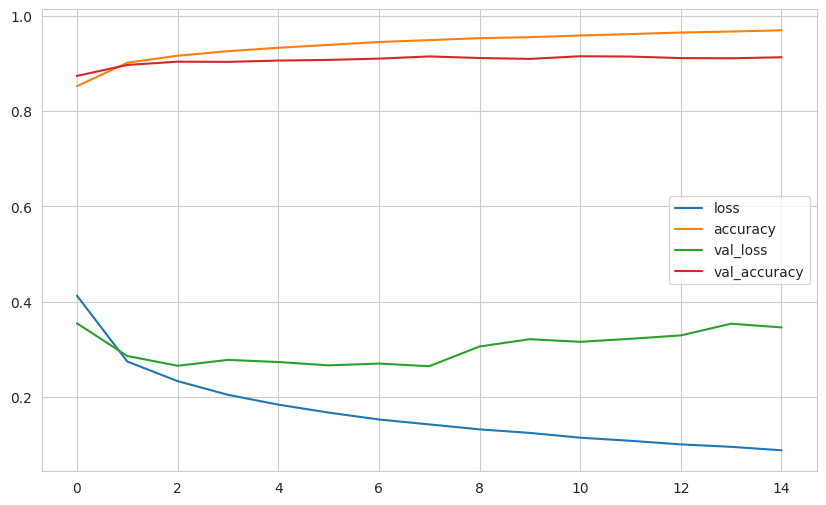

In [118]:
summary.plot();

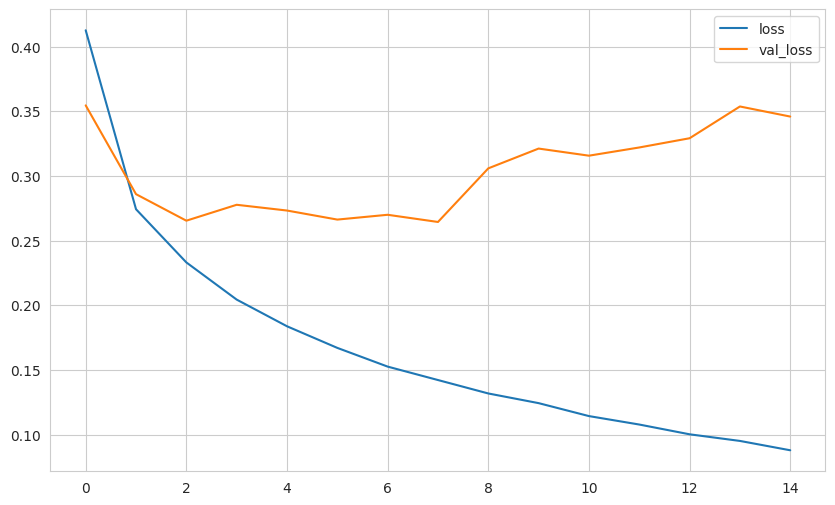

In [119]:
summary[["loss", "val_loss"]].plot();

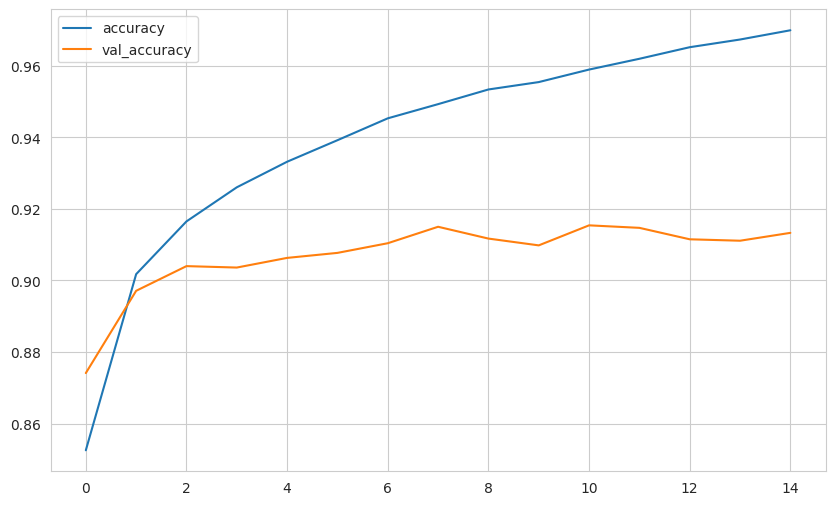

In [120]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [121]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [122]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3156 - accuracy: 0.9154


[0.31563690304756165, 0.9154000282287598]

In [123]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.31563690304756165
Test accuracy: 0.9154000282287598


In [124]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 2s 5ms/step


array([[4.3309236e-12, 5.3446038e-15, 9.2463162e-11, ..., 2.2479601e-06,
        2.3077354e-11, 9.9999720e-01],
       [1.2445775e-05, 5.0871703e-18, 9.9998754e-01, ..., 9.5705500e-19,
        5.4557204e-17, 2.3896202e-12],
       [1.3086073e-10, 9.9999994e-01, 2.7685054e-13, ..., 3.2645085e-11,
        2.4604034e-12, 4.2873191e-15],
       ...,
       [2.1473572e-12, 2.7586585e-21, 5.9389924e-12, ..., 3.7373105e-09,
        9.9999994e-01, 1.0608107e-13],
       [1.8642664e-11, 9.9999994e-01, 8.4075792e-14, ..., 1.4722574e-11,
        8.1230942e-15, 8.5374714e-14],
       [1.7125084e-06, 3.5228798e-09, 1.5564250e-06, ..., 2.6562506e-02,
        5.1690080e-05, 6.3373463e-04]], dtype=float32)

In [ ]:
pred_prob.shape

In [126]:
pred_prob[0]

array([4.3309236e-12, 5.3446038e-15, 9.2463162e-11, 2.1091622e-12,
       1.8446009e-13, 5.4387772e-07, 1.7046849e-10, 2.2479601e-06,
       2.3077354e-11, 9.9999720e-01], dtype=float32)

In [127]:
np.argmax(pred_prob[0])

9

In [128]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [129]:
y_pred.shape

(10000,)

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.89      0.83      0.86      1000
           3       0.92      0.94      0.93      1000
           4       0.83      0.91      0.87      1000
           5       0.98      0.97      0.98      1000
           6       0.79      0.70      0.74      1000
           7       0.96      0.97      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.91     10000



In [131]:
print(confusion_matrix(y_test, y_pred))

[[906   0   7  10   4   3  67   0   3   0]
 [  1 978   2  13   2   0   3   0   1   0]
 [ 26   0 834   8  74   1  57   0   0   0]
 [ 22   2   4 940  15   0  17   0   0   0]
 [  1   0  33  24 910   1  31   0   0   0]
 [  0   0   0   0   0 973   0  14   0  13]
 [142   0  54  19  87   0 696   0   2   0]
 [  0   0   0   0   0   8   0 968   0  24]
 [  6   0   1   5   0   2   7   5 974   0]
 [  0   0   0   0   0   4   1  20   0 975]]


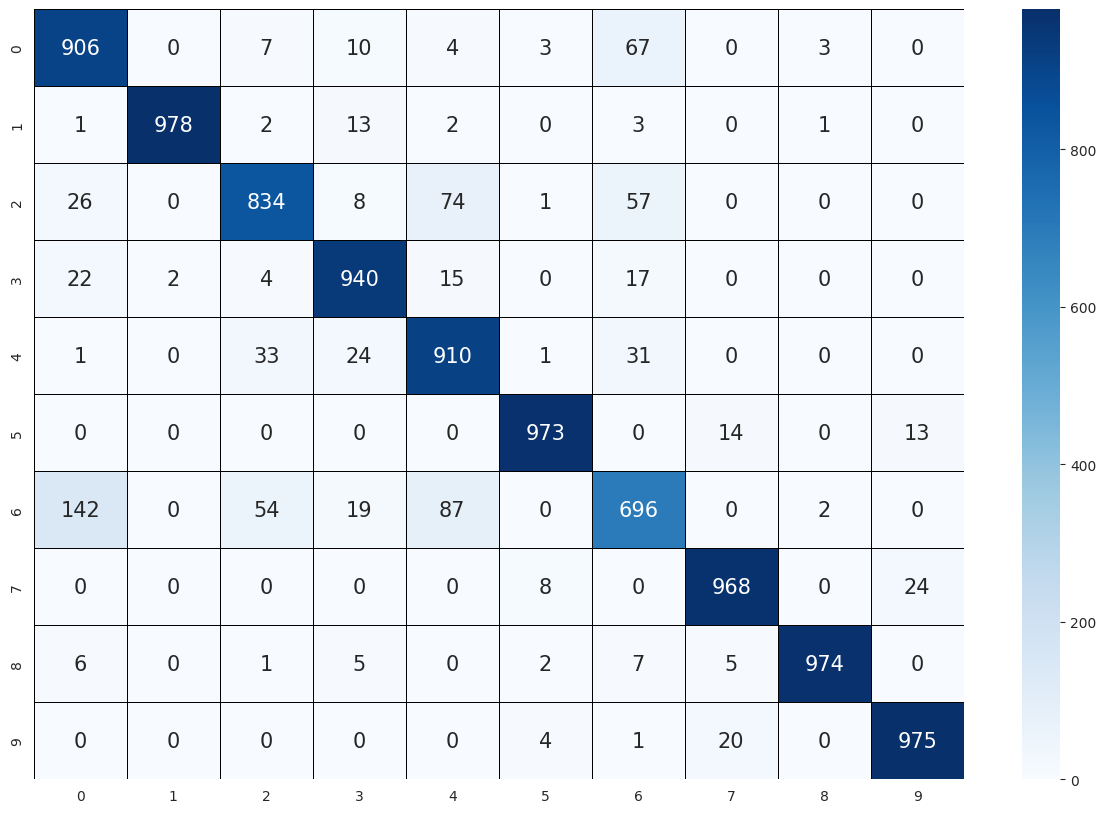

In [132]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [133]:
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [134]:
np.not_equal(y_test, y_pred).sum()

846

In [135]:
np.equal(y_test, y_pred).sum()

9154

## Prediction

In [184]:
my_image = X_test[55]

In [185]:
my_image.shape

(28, 28, 1)

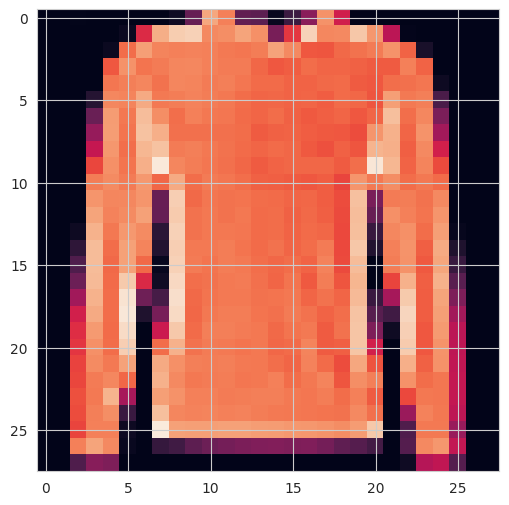

In [186]:
plt.imshow(my_image)
plt.show()

In [187]:
image_prediction = model.predict(my_image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 22ms/step


In [188]:
image_prediction

array([[1.9579482e-05, 3.0271022e-17, 9.9983394e-01, 1.8782574e-11,
        1.0161838e-07, 5.2304711e-14, 1.4631520e-04, 1.3735345e-17,
        7.5137586e-17, 4.3014385e-12]], dtype=float32)

In [189]:
np.argmax(image_prediction, axis=1)

array([2])

In [190]:
result = np.argmax(image_prediction, axis=1)

In [191]:
result

array([2])

In [192]:
classes[int(result)]

<ipython-input-192-749b2fb52b8a>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classes[int(result)]


'Pullover'

In [196]:
Y_test[55]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [199]:
orjinal=np.argmax(Y_test[55])
orjinal

2

In [200]:
classes[int(orjinal)]

'Pullover'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___